# Analysis

Capomulin decreaded the spread of tumor and overall was the best treatment method used. It reduced the spread of tumor faster than any of the comparing drugs. Also mice on capomulin had the greatest survival rate at 90% while the drugs comparing had a low rate of 35%.



In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
datacombine_df=pd.merge(mouse_drug_data_df,clinical_trial_data_to_load_df, on="Mouse ID")

# Display the data table for preview
datacombine_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [14]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = datacombine_df.groupby(["Drug", "Timepoint"], as_index=False) ["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

mean_tumor_df = mean_tumor.reset_index()

# Preview DataFrame
mean_tumor_df

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,45.000000
1,1,Capomulin,5,44.266086
2,2,Capomulin,10,43.084291
3,3,Capomulin,15,42.064317
4,4,Capomulin,20,40.716325
...,...,...,...,...
95,95,Zoniferol,25,55.432935
96,96,Zoniferol,30,57.713531
97,97,Zoniferol,35,60.089372
98,98,Zoniferol,40,62.916692


In [15]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stan_tumor = datacombine_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

stan_tumor = pd.DataFrame(stan_tumor)

# Preview DataFrame
stan_tumor.head().reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [27]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_reformatted = mean_tumor_df.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_reformatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


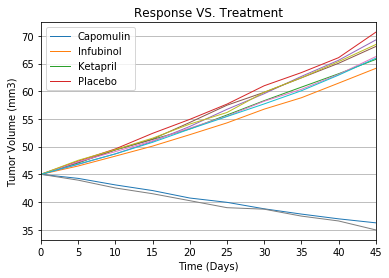

In [31]:
# Generate the Plot (with Error Bars)
chart = mean_tumor_reformatted.plot(kind="line", linewidth=1)

plt.title("Response VS. Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], fancybox=True, loc="best")

# Save the Figure
plt.savefig('Response VS. Treatment.png')

#show the Figure
plt.show()

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = datacombine_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met = pd.DataFrame(mean_met)

mean_met.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_met = mean_met.reset_index()
mean_met_pivot = mean_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

mean_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stan = datacombine_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

met_stan = pd.DataFrame(met_stan)

met_stan.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_stan = mean_met.reset_index()
met_stan_pivot = mean_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_stan_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


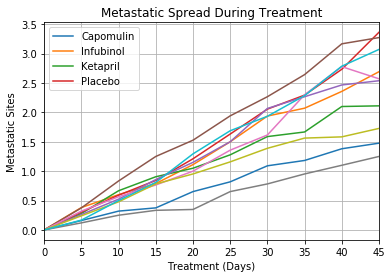

<Figure size 720x432 with 0 Axes>

In [60]:
# Generate the Plot (Accounting for percentages)
Metastaticspread = mean_met_pivot.plot(kind= "line")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], fancybox=True, loc="best")
plt.figure(figsize = (10,6))


# Save the Figure
plt.savefig('Metastatic Spread During Treatment Fig.png')

# Show the Figure
plt.show()

# Survival Rates

In [66]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_group_mice = datacombine_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouse_survival_rate = pd.DataFrame(count_group_mice)

# Preview DataFrame
mouse_survival_rate.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [70]:
# Minor Data Munging to Re-Format the Data Frames
mouse_survival_rate = mouse_survival_rate.reset_index()

# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_survival_rate = mouse_survival_rate.pivot(index="Timepoint", columns="Drug", values= "Mouse ID")

# Preview the Data Frame
reformat_mouse_survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


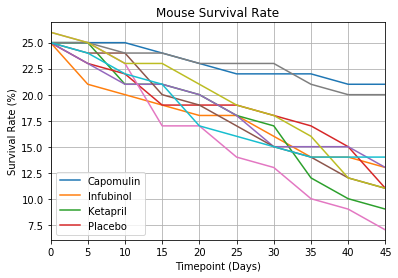

<Figure size 720x432 with 0 Axes>

In [86]:
# Generate the Plot (Accounting for percentages)
mouse_count_plot = reformat_mouse_survival_rate.plot(kind="line")

plt.title("Mouse Survival Rate")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="lower left")
plt.figure(figsize = (10,6))

# Save the Figure
plt.savefig('Mouse Survival Rate Fig.png')

# Show the Figure
plt.show()

# Summary Bar Graph

In [90]:
# Calculate the percent changes for each drug
end = mean_tumor_reformatted.iloc[0]
start = mean_tumor_reformatted.iloc[-1]
precent_change = ((end-start)/end)*100

# Display the data to confirm
precent_change

Drug
Capomulin    19.475303
Ceftamin    -42.516492
Infubinol   -46.123472
Ketapril    -57.028795
Naftisol    -53.923347
Placebo     -51.297960
Propriva    -47.241175
Ramicane     22.320900
Stelasyn    -52.085134
Zoniferol   -46.579751
dtype: float64

In [1]:
# Store all Relevant Percent Changes into a Tuple
summary_drug = precent_change[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Splice the data between passing and failing drugs
passing = precent_change[percent_change>0].loc[drugs].dropna(how="any")
failing= precent_change[percent_change>0].loc[drugs].dropna(how="any")

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor change over 45 Day Treatment")
plt.xlable("Treatment Drug")
plt.ylable("Precent Change")
plt.grid()
plt.xtricks(x_axis, drugs)

# Use functions to label the percentages of changes

## I am really not sure what to do for these two.
# Call functions to implement the function calls


# Save the Figure
plt.savefig()

# Show the Figure
plt.show()

NameError: name 'precent_change' is not defined